In [81]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [82]:
df=pd.read_excel('./ECU_IoHT.xlsx')

In [83]:
df.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
5,6,0.431963,192.168.43.1,192.168.43.186,DNS,144,Standard query response 0x0c44 No such name PT...,Normal,No Attack
6,7,0.433064,192.168.43.186,192.168.43.1,TCP,58,36954 > 1720 [SYN] Seq=0 Win=1024 Len=0 MSS=...,Normal,No Attack
7,8,0.433084,192.168.43.186,192.168.43.1,TCP,58,36954 > 5900 [SYN] Seq=0 Win=1024 Len=0 MSS=...,Normal,No Attack
8,9,0.433089,192.168.43.186,192.168.43.1,TCP,58,36954 > 135 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,Normal,No Attack
9,10,0.433092,192.168.43.186,192.168.43.1,TCP,58,36954 > 143 [SYN] Seq=0 Win=1024 Len=0 MSS=1460,Normal,No Attack


In [84]:
df.columns
df.drop('Info',inplace=True,axis=1)
df.drop('No.',inplace=True,axis=1)

In [85]:
df.head()

,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Attack,ARP Spoofing
1,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,Attack,ARP Spoofing
2,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Attack,ARP Spoofing
3,0.202713,192.168.43.186,192.168.43.1,DNS,85,Normal,No Attack
4,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,Attack,ARP Spoofing


In [86]:
for i,j in enumerate(df['Protocol'].unique()):
    print(i,j)

0 ARP
1 DNS
2 TCP
3 LLC
4 ICMP
5 UDP
6 DHCP
7 TLSv1.1
8 HTTP
9 TLSv1.2
10 OCSP


In [87]:
for i,j in enumerate(df['Type'].unique()):
    print(i,j)

0 Attack
1 Normal


In [88]:

l= enumerate(df['Type of attack'].unique())
for i,j in l:
    print(i,j)

0 ARP Spoofing
1 No Attack
2 Nmap Port Scan
3 Smurf Attack
4 DoS Attack


In [89]:
#clean type
for i,j in enumerate(df['Type'].unique()):
    df['Type'].replace(to_replace=j,value=i,inplace=True)

#clean type of attack
for i,j in enumerate(df['Type of attack'].unique()):
    df['Type of attack'].replace(to_replace=j,value=i,inplace=True)

#clean protocol
for i,j in enumerate(df['Protocol'].unique()):
    df['Protocol'].replace(to_replace=j,value=i,inplace=True)

#clean destination
for i,j in enumerate(df['Destination'].unique()):
    df['Destination'].replace(to_replace=j,value=i,inplace=True)

#clean Source
for i,j in enumerate(df['Source'].unique()):
    df['Source'].replace(to_replace=j,value=i,inplace=True)
    



In [90]:
df.head()

,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0.000000,0,0,0,42,0,0
1,0.002956,1,1,0,42,0,0
2,0.200725,0,0,0,42,0,0
3,0.202713,2,2,1,85,1,1
4,0.411565,1,1,0,42,0,0


In [91]:
df.shape

(111207, 7)

In [92]:
df.isnull().sum()

Time              0
Source            0
Destination       0
Protocol          0
Length            0
Type              0
Type of attack    0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Time            111207 non-null  float64
 1   Source          111207 non-null  int64  
 2   Destination     111207 non-null  int64  
 3   Protocol        111207 non-null  int64  
 4   Length          111207 non-null  int64  
 5   Type            111207 non-null  int64  
 6   Type of attack  111207 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.9 MB


<AxesSubplot: >

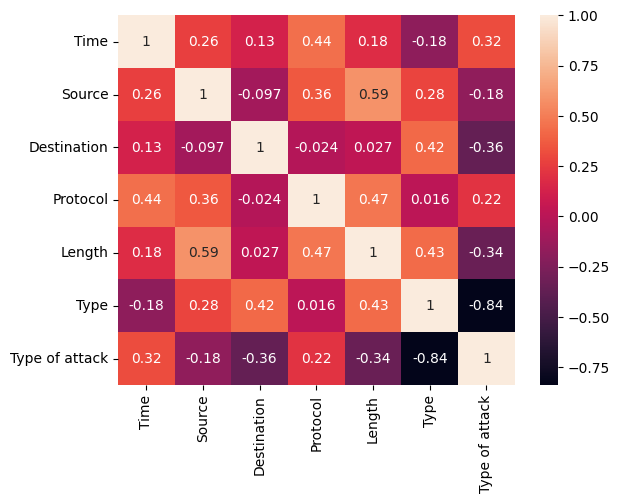

In [106]:
sns.heatmap(df.corr(),annot=True)

In [95]:
df.describe()

,Time,Source,Destination,Protocol,Length,Type,Type of attack
count,111207.000000,111207.000000,111207.000000,111207.000000,111207.000000,111207.000000,111207.000000
mean,6117.077210,5.952305,3.737472,3.735403,112.661091,0.210895,2.458847
std,2337.342593,6.924383,7.198467,1.610654,287.895879,0.407946,0.899373
min,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000
25%,6178.693881,5.000000,2.000000,4.000000,42.000000,0.000000,2.000000
50%,6745.549357,5.000000,2.000000,4.000000,42.000000,0.000000,3.000000
75%,7311.923211,5.000000,2.000000,4.000000,54.000000,0.000000,3.000000
max,10109.390320,68.000000,70.000000,10.000000,1474.000000,1.000000,4.000000


In [96]:
#df.to_csv('Cleaned_dataset.csv')

# CLASS IMBALANCE

In [97]:
cdf=pd.read_csv('./Cleaned_dataset.csv')

In [98]:
cdf.drop('Unnamed: 0',axis=1,inplace=True)

In [99]:
cdf.head()

,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0.000000,0,0,0,42,0,0
1,0.002956,1,1,0,42,0,0
2,0.200725,0,0,0,42,0,0
3,0.202713,2,2,1,85,1,1
4,0.411565,1,1,0,42,0,0


In [102]:
def cnt(i):
    a=cdf['Type'].isin([i]).sum()
    return a

l=map(cnt,sorted(cdf['Type of attack'].unique()))
list(l)
ll=map(cnt,sorted(cdf['Type'].unique()))
list(ll)


[87754, 23453]

<BarContainer object of 5 artists>

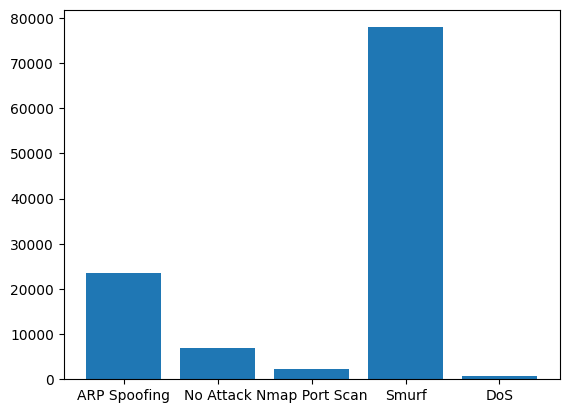

In [101]:
plt.bar(['ARP Spoofing','No Attack','Nmap Port Scan','Smurf','DoS'],[23453, 6836, 2359, 77920, 639])

<BarContainer object of 2 artists>

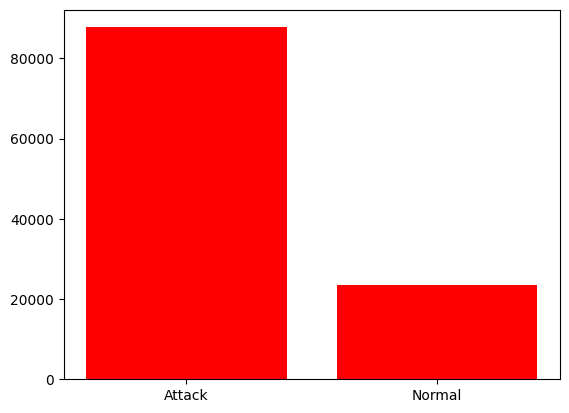

In [105]:
plt.bar(['Attack','Normal'],[87754, 23453],color='r')